In [1]:
import xgboost
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

print(xgboost.__version__)

1.5.1


# Read data

In [2]:
df_train = pd.read_csv('clean data/train.csv')
df_val = pd.read_csv('clean data/val.csv')
df_test = pd.read_csv('clean data/test.csv')

In [3]:
X_train = df_train.drop(columns='price', axis=0)
y_train = df_train['price']

X_val = df_val.drop(columns='price', axis=0)
y_val = df_val['price']

X_test = df_test.drop(columns='price', axis=0)
y_test = df_test['price']

# Training

In [4]:
model = xgboost.XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, enable_categorical=False,
             eta=0.1, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.100000001,
             max_delta_step=0, max_depth=7, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

# Result

In [5]:
import joblib

joblib.dump(model, 'Model/xgboost.pkl')
model = joblib.load('Model/xgboost.pkl')
y_pred = model.predict(X_test)

In [6]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print('MAE:', mae)
print('RMSE:', rmse)
print('MAPE:', mape)

MAE: 1.1452243897404228
RMSE: 1.680954245942296
MAPE: 0.21773351344947697


In [7]:
from matplotlib import pyplot as plt

def plot_evaluate(y_true, y_pred):
    plt.plot(y_true, y_pred, 'b.')
    x = [np.min(y_true), np.max(y_true)]
    y = x
    plt.plot(x, y, 'r')
    plt.title('XGBoost')
    plt.xlabel('Reality')
    plt.ylabel('Predict')
    plt.show()

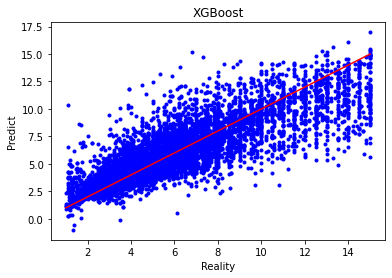

In [8]:
plot_evaluate(y_test, y_pred)

In [9]:
# param = {
#          'max_depth':[2,3,4,5,6,7],
#          'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001],
#          'n_estimators':[100, 150,200,500,900,1200,1500], 
#          'n_estimators':[100,250,500,750,1000,1250,1500,1750],
#          'min_samples_split':[2,4,6,8,10,20,40,60,100], 
#          'min_samples_leaf':[1,3,5,7,9],
#          'max_features':[2,3,4,5,6,7],
#          'subsample':[0.7,0.75,0.8,0.85,0.9,0.95,1]
#          }

In [10]:
# from sklearn.model_selection import RandomizedSearchCV
# regressor = xgboost.XGBRegressor()
# random_cv = RandomizedSearchCV(estimator=regressor,
#                               param_distributions=param,
#                               cv=5,n_iter=50,
#                               scoring='neg_mean_absolute_error',n_jobs=-1,
#                               verbose=5,
#                               return_train_score=True,
#                               random_state=42)

In [11]:
# random_cv.fit(X_train,y_train)